In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
m = df.isnull().sum() 
m[m > 0]

Series([], dtype: int64)

In [4]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

Step 1: Exploratory Data Analysis (EDA)

i. Summarize dataset structure, missing values, and class distribution.

ii. Visualize feature distributions and correlations.

iii. Compare activity patterns across subjects.

iv. Plot activity frequency.

v. Use PCA or t-SNE for dimensionality reduction and visualize clusters.

vi. Identify highly correlated features, remove highly correlated features (to reduce multicollinearity).
Also, check correlation between target variable and predictors and choose significant predictors.

vii. Compute mean and standard deviation of all sensor features grouped by Activity and answer:

Which activity has the highest average body acceleration on X-axis?

Which activity shows the least variability in gyroscope reading?

viii. For each subject, calculate count of observations per activity and identify:

Which subject performed WALKING_UPSTAIRS most frequently?

Which subject has the most balanced activity distribution?

ix. For each activity, compute correlation between tBodyAcc-mean()-X and tBodyAcc-mean()-Y.

Which activity shows the strongest positive correlation?

x. For each subject and activity, calculate:

Mean of tBodyAcc-mean()-X

Median of tBodyAcc-std()-Y

Count of observations
Present the result as a multi-index DataFrame.

In [5]:
features = [c for c in df.columns if c not in ['Activity','subject']]
var = df[features].var().sort_values(ascending=False)
top_var = var.index[:20].to_list()
top_var

['fBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Y',
 'tBodyAccJerkMag-entropy()',
 'fBodyAcc-entropy()-X',
 'tGravityAcc-correlation()-X,Z',
 'tGravityAcc-correlation()-Y,Z',
 'tBodyGyroJerkMag-entropy()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-correlation()-X,Y',
 'fBodyAccMag-entropy()',
 'tBodyAccMag-entropy()',
 'tGravityAccMag-entropy()',
 'fBodyBodyAccJerkMag-entropy()',
 'fBodyAcc-entropy()-Y',
 'tBodyAccJerk-entropy()-X',
 'fBodyAccJerk-entropy()-Z',
 'tBodyAccJerk-entropy()-Y',
 'fBodyBodyGyroJerkMag-entropy()',
 'fBodyGyro-entropy()-Y',
 'fBodyAcc-entropy()-Z']

<Axes: >

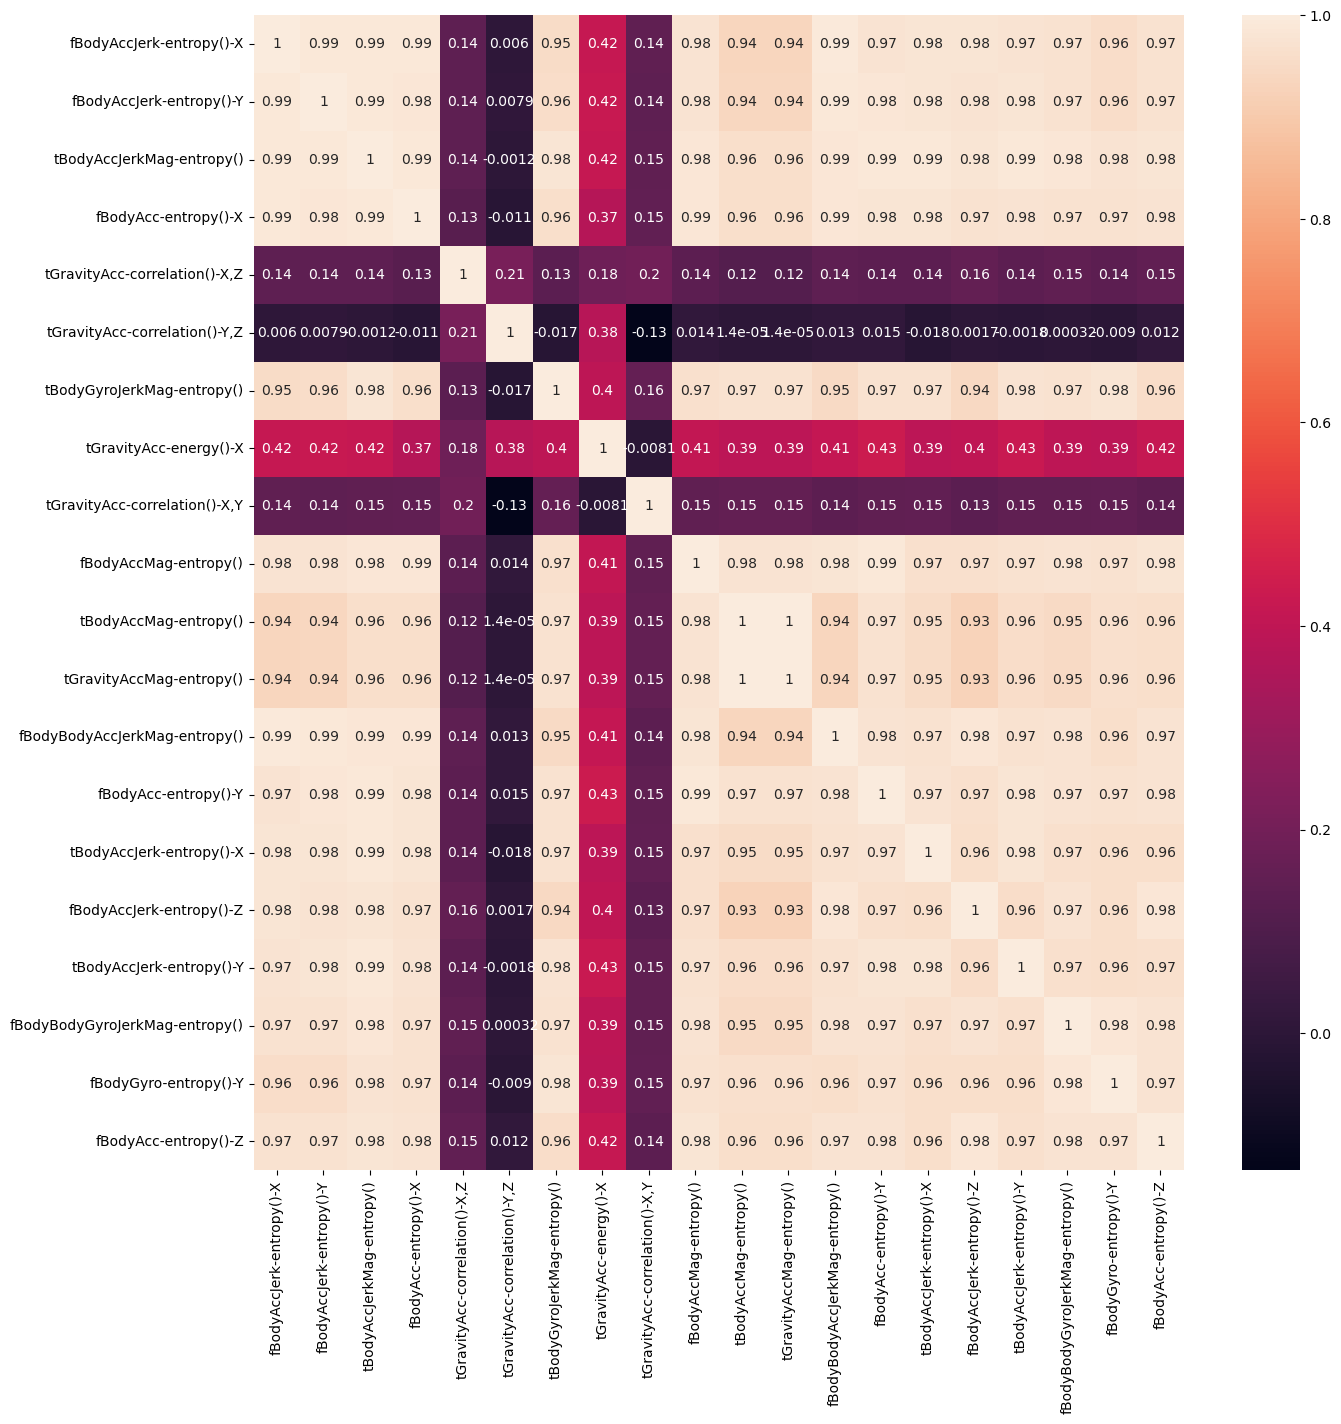

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[top_var].corr(), annot=True)

In [7]:
df[top_var].corr()

,fBodyAccJerk-entropy()-X,fBodyAccJerk-entropy()-Y,tBodyAccJerkMag-entropy(),fBodyAcc-entropy()-X,"tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyGyroJerkMag-entropy(),tGravityAcc-energy()-X,"tGravityAcc-correlation()-X,Y",fBodyAccMag-entropy(),tBodyAccMag-entropy(),tGravityAccMag-entropy(),fBodyBodyAccJerkMag-entropy(),fBodyAcc-entropy()-Y,tBodyAccJerk-entropy()-X,fBodyAccJerk-entropy()-Z,tBodyAccJerk-entropy()-Y,fBodyBodyGyroJerkMag-entropy(),fBodyGyro-entropy()-Y,fBodyAcc-entropy()-Z
fBodyAccJerk-entropy()-X,1.000000,0.988666,0.988029,0.989862,0.140397,0.006012,0.951581,0.416632,0.144955,0.976990,0.937191,0.937191,0.992583,0.974445,0.978203,0.979038,0.974075,0.970171,0.958305,0.970048
fBodyAccJerk-entropy()-Y,0.988666,1.000000,0.989667,0.983458,0.141330,0.007866,0.958179,0.419814,0.141877,0.976184,0.942071,0.942071,0.988162,0.984971,0.978808,0.976266,0.982252,0.971956,0.958729,0.970342
tBodyAccJerkMag-entropy(),0.988029,0.989667,1.000000,0.989133,0.141805,-0.001249,0.978816,0.416679,0.145044,0.984949,0.962853,0.962853,0.986246,0.987382,0.987307,0.979208,0.987842,0.982395,0.976113,0.980903
fBodyAcc-entropy()-X,0.989862,0.983458,0.989133,1.000000,0.125542,-0.010793,0.963957,0.373896,0.149183,0.986136,0.960713,0.960713,0.985529,0.980567,0.980716,0.972994,0.975854,0.973252,0.969325,0.975346
"tGravityAcc-correlation()-X,Z",0.140397,0.141330,0.141805,0.125542,1.000000,0.212150,0.132843,0.184649,0.196217,0.136047,0.116856,0.116856,0.142596,0.139135,0.136097,0.155623,0.136999,0.146273,0.135717,0.150577
"tGravityAcc-correlation()-Y,Z",0.006012,0.007866,-0.001249,-0.010793,0.212150,1.000000,-0.016678,0.379103,-0.134751,0.014481,0.000014,0.000014,0.013236,0.014652,-0.018386,0.001671,-0.001820,0.000316,-0.009032,0.011568
tBodyGyroJerkMag-entropy(),0.951581,0.958179,0.978816,0.963957,0.132843,-0.016678,1.000000,0.395220,0.160713,0.966217,0.969856,0.969856,0.949649,0.971309,0.972140,0.943847,0.975437,0.971531,0.979132,0.959716
tGravityAcc-energy()-X,0.416632,0.419814,0.416679,0.373896,0.184649,0.379103,0.395220,1.000000,-0.008129,0.407457,0.388410,0.388410,0.413681,0.433779,0.389498,0.400416,0.425077,0.394891,0.388584,0.416323
"tGravityAcc-correlation()-X,Y",0.144955,0.141877,0.145044,0.149183,0.196217,-0.134751,0.160713,-0.008129,1.000000,0.145758,0.154078,0.154078,0.136372,0.146042,0.151575,0.132553,0.148740,0.148796,0.150092,0.136754
fBodyAccMag-entropy(),0.976990,0.976184,0.984949,0.986136,0.136047,0.014481,0.966217,0.407457,0.145758,1.000000,0.976914,0.976914,0.979289,0.986733,0.968530,0.967776,0.971525,0.975488,0.972958,0.982014


<Axes: xlabel='subject', ylabel='count'>

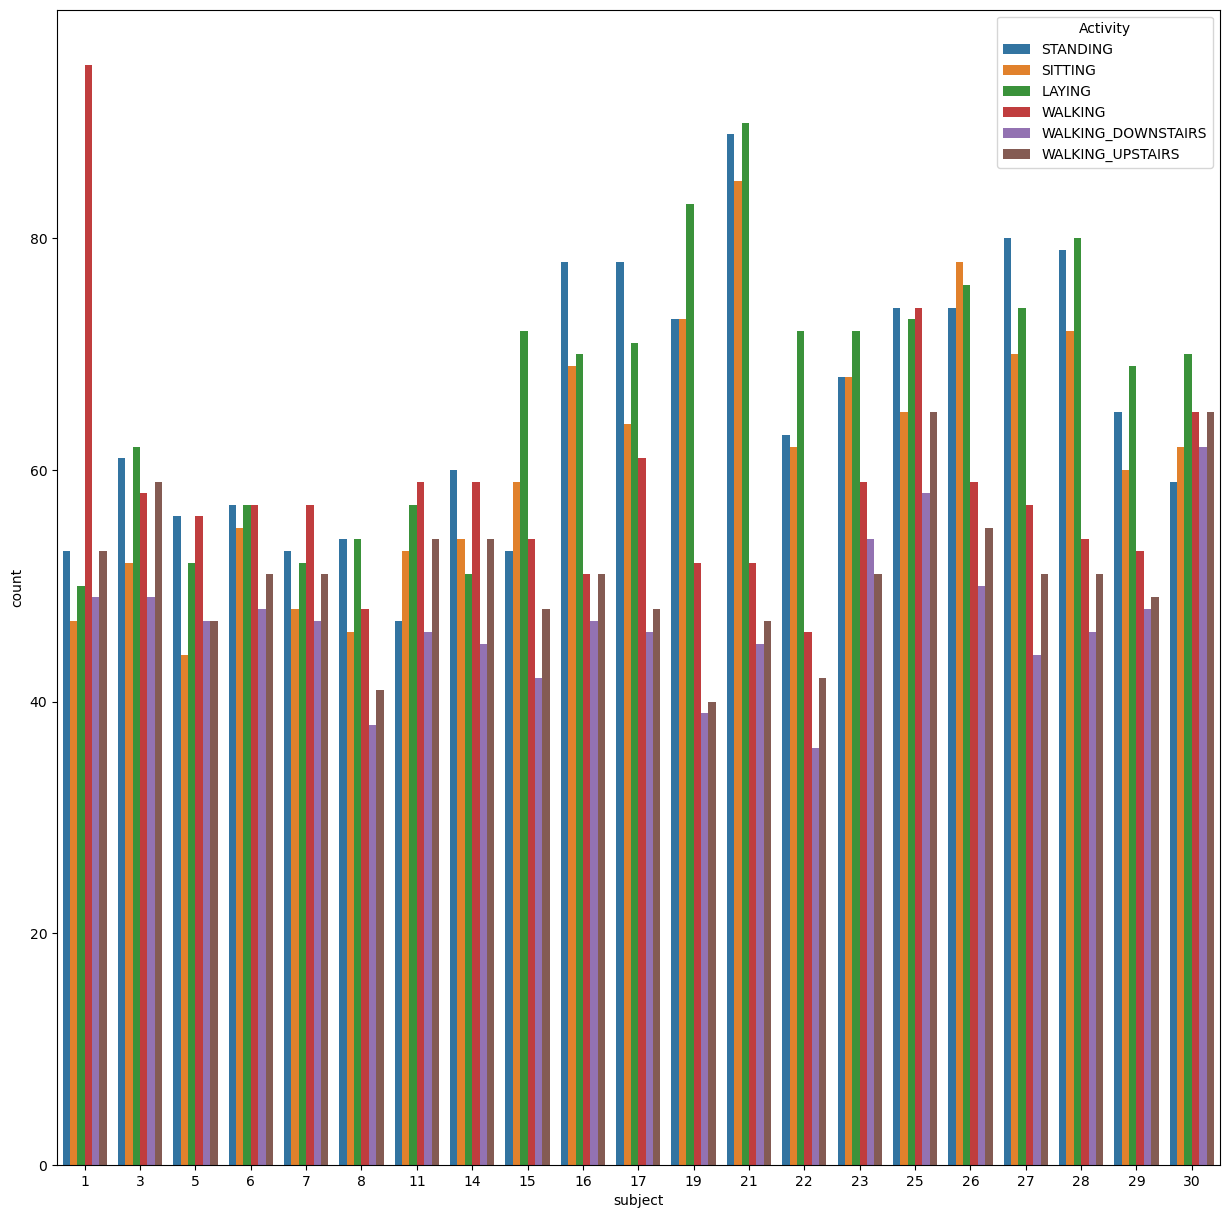

In [8]:
plt.figure(figsize=(15, 15))
sns.countplot(x='subject', hue='Activity', data=df)